In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [53]:
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.patches import Rectangle
import tensorflow as tf
import random as python_random
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor



In [55]:
! pip install minisom
import minisom
from minisom import MiniSom

!pip install kneed
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

%matplotlib inline

In [56]:
data = pd.read_csv('curated-solubility-dataset.csv')

In [57]:
data.keys()

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

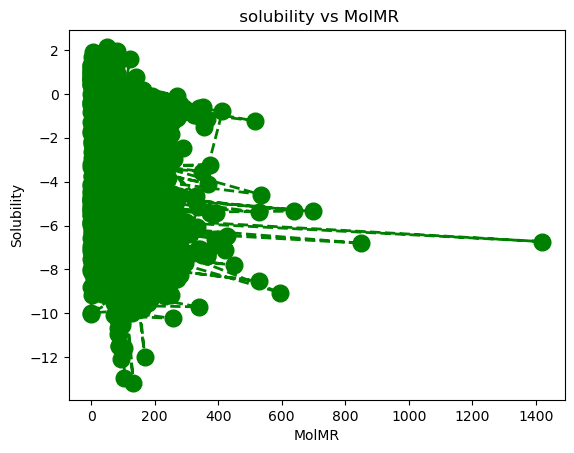

In [63]:
plt.plot(data['MolMR'], data['Solubility'],color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)
plt.title(' solubility vs MolMR')
plt.xlabel('MolMR')
plt.ylabel('Solubility')
plt.show()

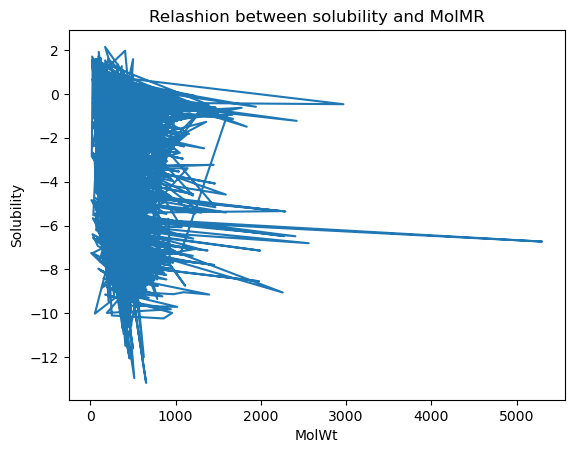

In [23]:

plt.plot(data['MolWt'], data['Solubility'])
plt.title('Relashion between solubility and MolMR')
plt.xlabel('MolWt')
plt.ylabel('Solubility')
plt.show()

SyntaxError: invalid syntax (1064312208.py, line 1)

        ID                     InChIKey    MolWt
0      A-3  SZEMGTQCPRNXEG-UHFFFAOYSA-M  392.510
1      A-4  GPYLCFQEKPUWLD-UHFFFAOYSA-N  169.183
2      A-5  AVPYQKSLYISFPO-UHFFFAOYSA-N  140.569
3      A-8  XTUPUYCJWKHGSW-UHFFFAOYSA-L  756.226
4      A-9  FAUAZXVRLVIARB-UHFFFAOYSA-N  422.525
...    ...                          ...      ...
9977  I-84  GKCBAIGFKIBETG-UHFFFAOYSA-N  264.369
9978  I-85  OFVLGDICTFRJMM-WESIUVDSSA-N  444.440
9979  I-86  MGSRCZKZVOBKFT-UHFFFAOYSA-N  150.221
9980  I-93  SGTNSNPWRIOYBX-UHFFFAOYSA-N  454.611
9981  I-94  PJVWKTKQMONHTI-UHFFFAOYSA-N  308.333

[9982 rows x 3 columns]


,Solubility,MolWt,RingCount
0,-3.616127,392.510,0.0
1,-3.254767,169.183,3.0
2,-2.177078,140.569,1.0
3,-3.924409,756.226,6.0
4,-4.662065,422.525,6.0
...,...,...,...
9977,-3.010000,264.369,1.0
9978,-2.930000,444.440,4.0
9979,-2.190000,150.221,1.0
9980,-3.980000,454.611,2.0


In [59]:
for row in data:
    print(row)

ID
Name
InChI
InChIKey
SMILES
Solubility
SD
Ocurrences
Group
MolWt
MolLogP
MolMR
HeavyAtomCount
NumHAcceptors
NumHDonors
NumHeteroatoms
NumRotatableBonds
NumValenceElectrons
NumAromaticRings
NumSaturatedRings
NumAliphaticRings
RingCount
TPSA
LabuteASA
BalabanJ
BertzCT


In [52]:
a.head(5)

,ID,InChIKey,MolWt
0,A-3,SZEMGTQCPRNXEG-UHFFFAOYSA-M,392.510
1,A-4,GPYLCFQEKPUWLD-UHFFFAOYSA-N,169.183
2,A-5,AVPYQKSLYISFPO-UHFFFAOYSA-N,140.569
3,A-8,XTUPUYCJWKHGSW-UHFFFAOYSA-L,756.226
4,A-9,FAUAZXVRLVIARB-UHFFFAOYSA-N,422.525


In [ ]:
# Display the first few rows of the dataset
data.head()

# Get information about the dataset
data.info()

# Generate basic statistics for numerical columns
data.describe()


In this dataset,the author standardizes the unit of the solubility values to LogS, where S is the aqueous solubility (mol/L). Four groups are then categorized according to LogS: highly soluble (> 0),soluble (≤ 0 but > -2), slightly soluble (≤ -2 but > -4), and insoluble (≤-4)

In [26]:
insoluble = data[(data['Solubility'] <= -4)]
insoluble.shape

(2879, 26)

In [27]:
slightly_soluble = data[(data['Solubility'] > -4) & (data['Solubility'] <= -2)]
slightly_soluble.shape

(3207, 26)

In [28]:
soluble = data[(data['Solubility'] > -2) & (data['Solubility'] <= 0)]
soluble.shape

(2840, 26)

In [29]:
highly_soluble = data[(data['Solubility'] > 0)]
highly_soluble.shape

(1056, 26)

Histogram Visualization of The Four Categories

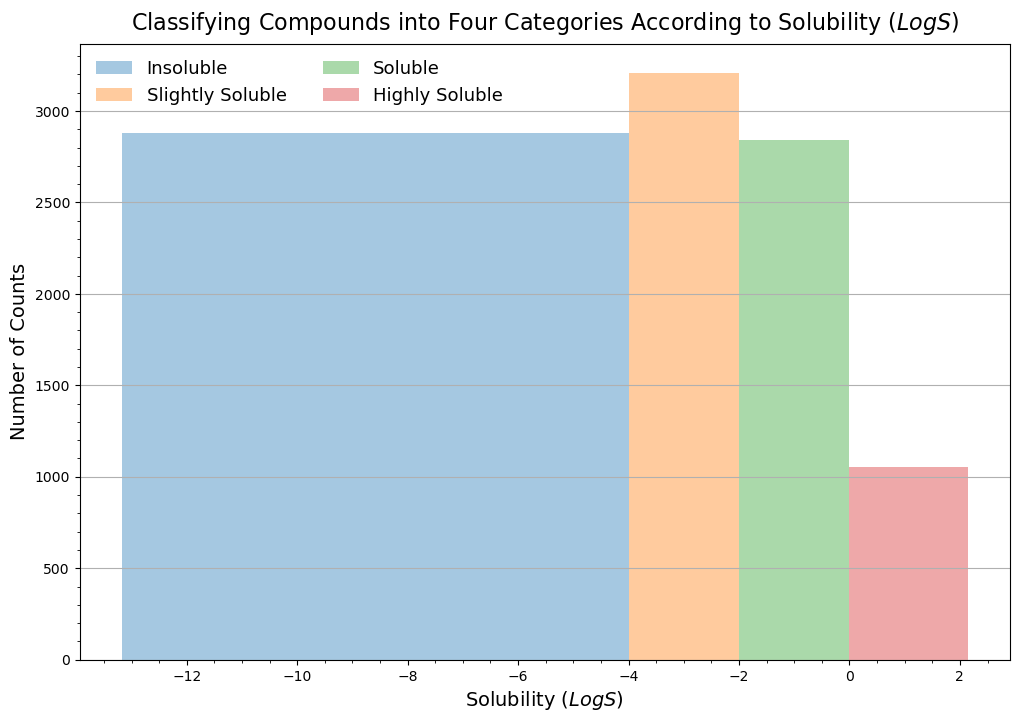

In [30]:
plt.figure(figsize=(12,8))
plt.hist(insoluble['Solubility'], bins=1, alpha = 0.4, density=False, label='Insoluble')
plt.hist(slightly_soluble['Solubility'], bins=1, alpha = 0.4, density=False, label='Slightly Soluble')
plt.hist(soluble['Solubility'], bins=1, alpha = 0.4, density=False, label='Soluble')
plt.hist(highly_soluble['Solubility'], bins=1, alpha = 0.4, density=False, label='Highly Soluble')
plt.legend(loc = 'upper left', frameon = False, fontsize = 13, ncol = 2)
plt.title('Classifying Compounds into Four Categories According to Solubility ($LogS$)', fontsize = 16, pad = 10)
plt.grid(axis = 'y')
plt.xlabel('Solubility ($LogS$)', fontsize = 14)
plt.ylabel('Number of Counts', fontsize = 14)
plt.minorticks_on()

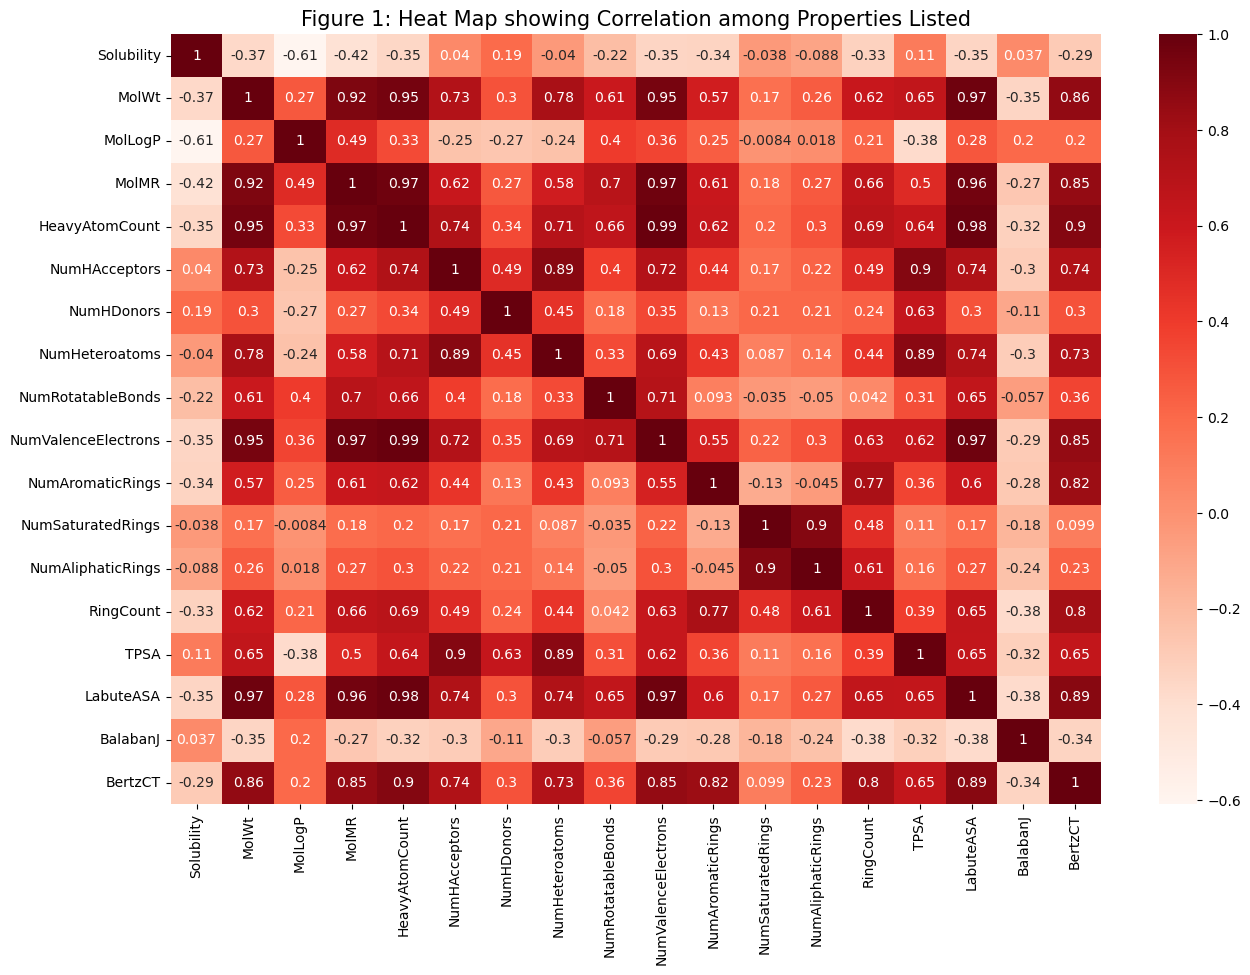

In [13]:
df=data.drop(columns=['SD', 'Ocurrences'])
plt.figure(figsize=(15,10))
plt.title("Figure 1: Heat Map showing Correlation among Properties Listed",fontsize=15)
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) #annot gives actual value of each box
plt.show()

Observations: Based on this feature correlation diagram, we can see that there are a lot of properties which are strongly correlated to each other. For instance, NumSatureatedRings vs. NumAliphaticRings, HeavyAtomCount vs.NumValenceElectrongs show strongly positive correlations. For our interests on exploring trend between Solubility and other properties, we can see that octonal-water partition coefficient (MolLogP) showed a strong negative correlation (-0.61) to solubility, other than this, there isn't any strong correlation observed. These findings agrees with the above curve fitting results. 

In the solubility dataset,the author standardizes the unit of the solubility values to LogS, where S is the aqueous solubility (mol/L). Four groups are then categorized according to LogS: highly soluble (> 0), soluble (≤ ≤ 0 but > -2), slightly soluble (≤≤ -2 but > -4), and insoluble (≤ ≤ -4) [13][13]
 

In [14]:
insoluble = data[(data['Solubility'] <= -4)]
slightly_soluble = data[(data['Solubility'] > -4) & (data['Solubility'] <= -2)]
soluble = data[(data['Solubility'] > -2) & (data['Solubility'] <= 0)]
highly_soluble = data[(data['Solubility'] > 0)]
print(len(insoluble), len(slightly_soluble), len(soluble), len(highly_soluble))

2879 3207 2840 1056


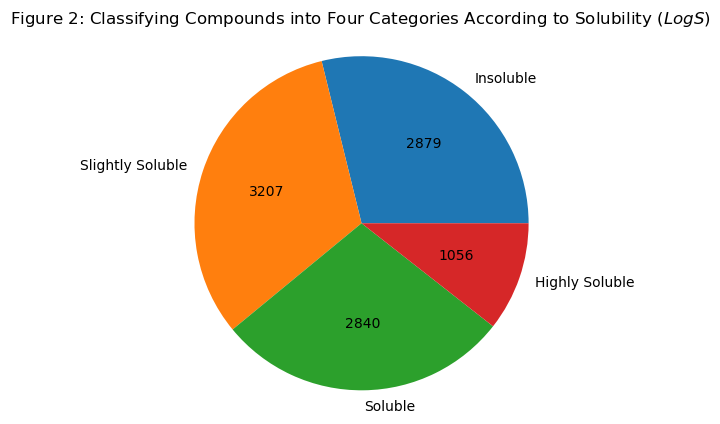

In [15]:
# pie chart for the visualization of the four categories
labels = "Insoluble", "Slightly Soluble", "Soluble", "Highly Soluble"
sizes = np.array([2879, 3207, 2840, 1056])

p, tx, autotexts = plt.pie(sizes, labels=labels,
        autopct="")

for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))

plt.axis('equal')
plt.title('Figure 2: Classifying Compounds into Four Categories According to Solubility ($LogS$)', pad = 10)
plt.show() 

Hypothesis or patterns you intend on exploring in your study using the methods covered in this course:

A) The relationship between solubility and the topological polar surface area (TPSA)

B) The relationship between solubility and "salt" compounds

C) The relationship among solubility, molecular weight (MolWt)

D) The relationship between solubility and Molecular Structure (Number of Valence Electrons & Number of Rotatable Bonds)

A) The relationship between solubility and the topological polar surface area (TPSA)

In [16]:
modelB = linear_model.LinearRegression()
xB = data['TPSA']
XB= data[['TPSA']] #2D vector use [[]]
yB = data['Solubility']

modelB.fit(XB,yB)
xfitB = np.linspace(0,1200)
XfitB = xfitB[:, np.newaxis] #this changes xfit from a horizontal array to a vertical array!
yfitB = modelB.predict(XfitB)

betaB=modelB.coef_[0] #beta_1
print("Coefficient =",betaB)

interceptB=modelB.intercept_ #beta_0
print("Intercept =",interceptB)

Coefficient = 0.004174275939358633
Intercept = -3.1506282421620804


/Users/mitikuagmuas/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 0, 'Topological Polar Surface Area (TPSA)')

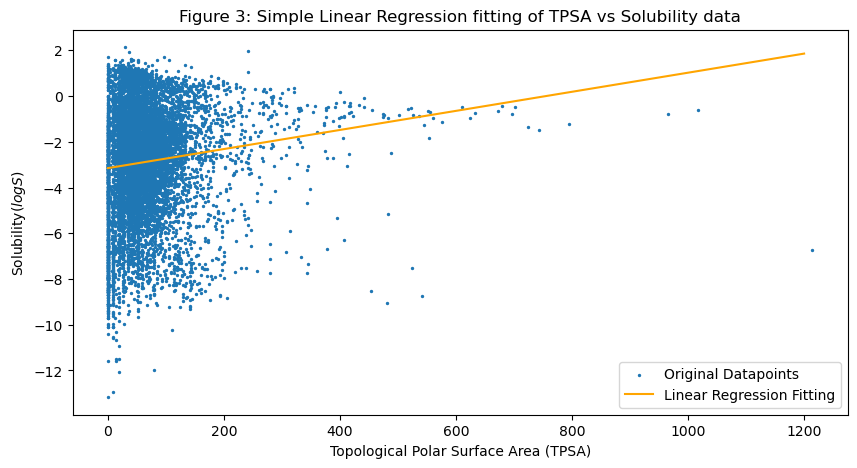

In [17]:
plt.figure(figsize = (10,5))
plt.scatter(xB, yB, s=2, label='Original Datapoints')
plt.plot(xfitB, yfitB, c='orange', label='Linear Regression Fitting');
plt.legend()
plt.title('Figure 3: Simple Linear Regression fitting of TPSA vs Solubility data')
plt.ylabel('Solubility($logS$)')
plt.xlabel('Topological Polar Surface Area (TPSA)')

In [18]:
#Mean Square Error for modelB:
from sklearn.metrics import mean_squared_error
print("MSE=",mean_squared_error(yB, modelB.predict(data[['TPSA']])))

# R^2 value for modelB:
r_squaredB = 1-np.sum((yB-(modelB.intercept_+modelB.coef_*data['TPSA']))**2)/(np.var(yB)*(len(yB)))

print("R^2=",r_squaredB)
print(" ")
print("Calculating TPSA for groups classified above:")
print("Insoluble:",insoluble['TPSA'].mean())
print("Slightly Soluble:",slightly_soluble['TPSA'].mean())
print("Soluble:",soluble['TPSA'].mean())
print("Highly Soluble:",highly_soluble['TPSA'].mean())


MSE= 5.537675692962828
R^2= 0.012468444735951989
 
Calculating TPSA for groups classified above:
Insoluble: 52.68608891976361
Slightly Soluble: 60.35495166822581
Soluble: 74.52490140845103
Highly Soluble: 63.03926136363633


B) Exploring the relationship between solubility and "Salt" Compounds

In [19]:
#Sodium Salts

print(len(insoluble[insoluble['SMILES'].str.contains('Na+', case = False, regex = False)]['Solubility']),
len(slightly_soluble[slightly_soluble['SMILES'].str.contains('Na+', case = False, regex = False)]['Solubility']),
len(soluble[soluble['SMILES'].str.contains('Na+', case = False, regex = False)]['Solubility']),
len(highly_soluble[highly_soluble['SMILES'].str.contains('Na+', case = False, regex = False)]['Solubility'])
)

14 51 194 110


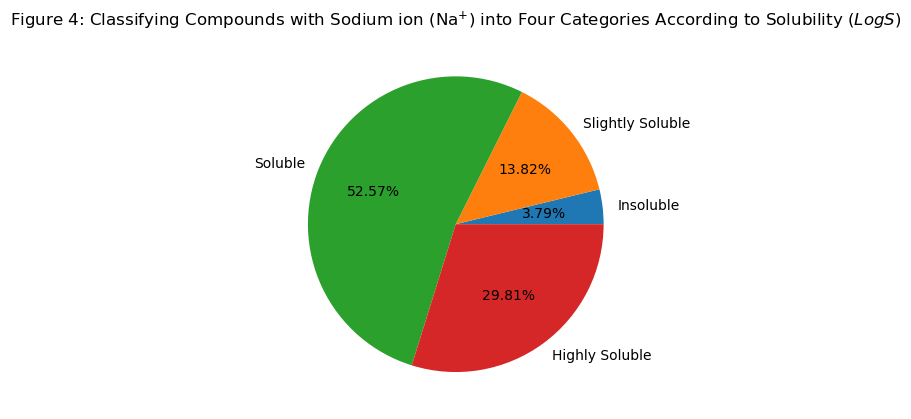

In [20]:
pie_Na = np.array([14, 51, 194, 110])
labels = ["Insoluble", "Slightly Soluble", "Soluble", "Highly Soluble"]
plt.pie(pie_Na,labels = labels, autopct='%1.2f%%')
plt.title('Figure 4: Classifying Compounds with Sodium ion (Na$^{+}$) into Four Categories According to Solubility ($LogS$)', pad = 10)
plt.show() 

In [21]:
#Potassium Salts

print(len(insoluble[insoluble['SMILES'].str.contains('K+', case = False, regex = False)]['Solubility']),
len(slightly_soluble[slightly_soluble['SMILES'].str.contains('K+', case = False, regex = False)]['Solubility']),
len(soluble[soluble['SMILES'].str.contains('K+', case = False, regex = False)]['Solubility']),
len(highly_soluble[highly_soluble['SMILES'].str.contains('K+', case = False, regex = False)]['Solubility'])
)

3 3 17 30


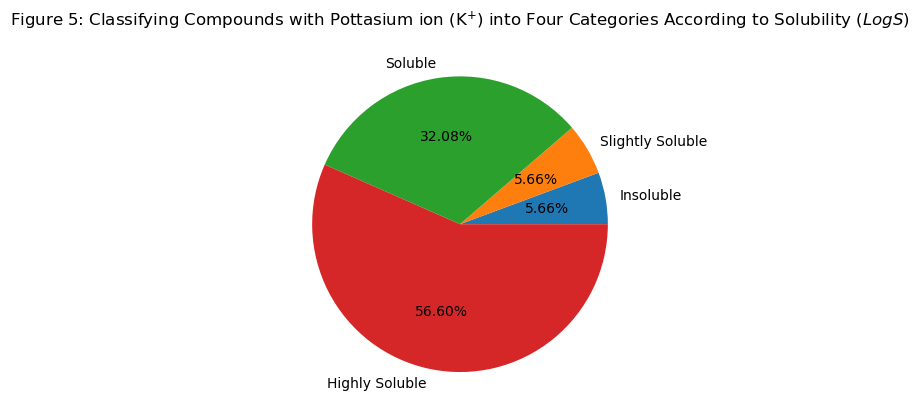

In [22]:
pie_K = np.array([3, 3, 17, 30])
labels = ["Insoluble", "Slightly Soluble", "Soluble", "Highly Soluble"]
plt.pie(pie_K,labels = labels, autopct='%1.2f%%')
plt.title('Figure 5: Classifying Compounds with Pottasium ion (K$^{+}$) into Four Categories According to Solubility ($LogS$)', pad = 10)
plt.show()

In [23]:
#chloride salts
print(len(insoluble[insoluble['SMILES'].str.contains('Cl-', case = False, regex = False)]['Solubility']),
len(slightly_soluble[slightly_soluble['SMILES'].str.contains('Cl-', case = False, regex = False)]['Solubility']),
len(soluble[soluble['SMILES'].str.contains('Cl-', case = False, regex = False)]['Solubility']),
len(highly_soluble[highly_soluble['SMILES'].str.contains('Cl-', case = False, regex = False)]['Solubility'])
)

8 16 42 61


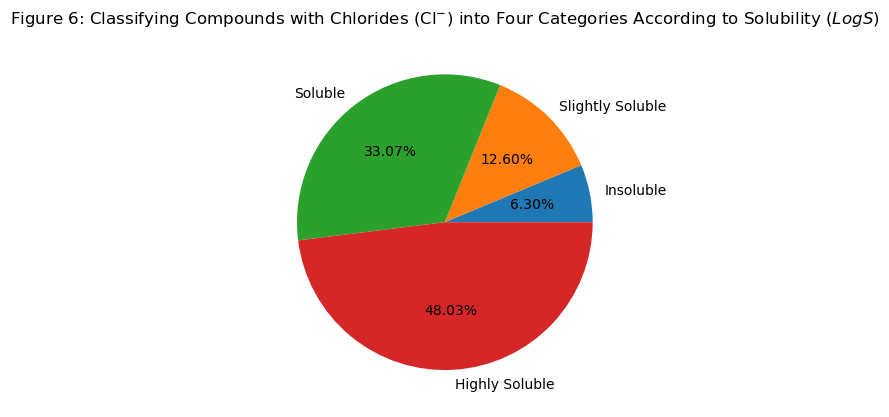

In [24]:
pie_Cl = np.array([8, 16, 42, 61])
labels = ["Insoluble", "Slightly Soluble", "Soluble", "Highly Soluble"]
plt.pie(pie_Cl,labels = labels, autopct='%1.2f%%')
plt.title('Figure 6: Classifying Compounds with Chlorides (Cl$^{-}$) into Four Categories According to Solubility ($LogS$)', pad = 10)
plt.show() 

In [25]:
#Nitrate Salts

print(len(insoluble[insoluble['Name'].str.contains('nitrate', case = False, regex = False)]['Solubility']),
len(slightly_soluble[slightly_soluble['Name'].str.contains('nitrate', case = False, regex = False)]['Solubility']),
len(soluble[soluble['Name'].str.contains('nitrate', case = False, regex = False)]['Solubility']),
len(highly_soluble[highly_soluble['Name'].str.contains('nitrate', case = False, regex = False)]['Solubility'])
)

2 16 10 14


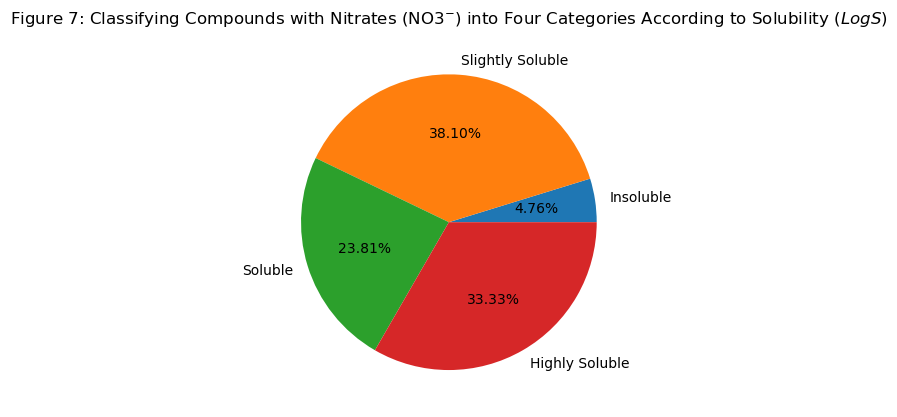

In [26]:
pie_nitrate = np.array([2, 16, 10, 14])
labels = ["Insoluble", "Slightly Soluble", "Soluble", "Highly Soluble"]
plt.pie(pie_nitrate,labels = labels, autopct='%1.2f%%')
plt.title('Figure 7: Classifying Compounds with Nitrates (NO3$^{-}$) into Four Categories According to Solubility ($LogS$)', pad = 10)
plt.show() 

In [33]:
print("For number of Valence Electrons:")
print("Insoluble mean:", insoluble['NumValenceElectrons'].mean(), "Insoluble median:", insoluble['NumValenceElectrons'].median())
print("Slightly soluble mean:", slightly_soluble['NumValenceElectrons'].mean(), "Slightly soluble median:", slightly_soluble['NumValenceElectrons'].median())
print("Soluble mean:", soluble['NumValenceElectrons'].mean(), "Soluble median:", soluble['NumValenceElectrons'].median())
print("Highly soluble mean:", highly_soluble['NumValenceElectrons'].mean(), "Hightly soluble median:", highly_soluble['NumValenceElectrons'].median())

For number of Valence Electrons:
Insoluble mean: 123.86592566863494 Insoluble median: 108.0
Slightly soluble mean: 90.26629248518864 Slightly soluble median: 82.0
Soluble mean: 82.41725352112677 Soluble median: 66.0
Highly soluble mean: 57.36647727272727 Hightly soluble median: 50.0


In [43]:
x = data[['NumValenceElectrons']]
print(x)

      NumValenceElectrons
0                   142.0
1                    62.0
2                    46.0
3                   264.0
4                   164.0
...                   ...
9977                106.0
9978                170.0
9979                 60.0
9980                180.0
9981                116.0

[9982 rows x 1 columns]


In [45]:
import numpy as np

# Assuming data is your 1D array
data = np.array(['NumValenceElectrons'])  # Replace this with your actual data

# Reshape data to a 2D array
data_reshaped = data.reshape(-1, 1)

# Now you can use data_reshaped for machine learning


C) Exploring the Relationship between Molecular Weight 

/Users/mitikuagmuas/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/Users/mitikuagmuas/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/Users/mitikuagmuas/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/Users/mitikuagmuas/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/Users/mitikuagmuas/opt/anaconda

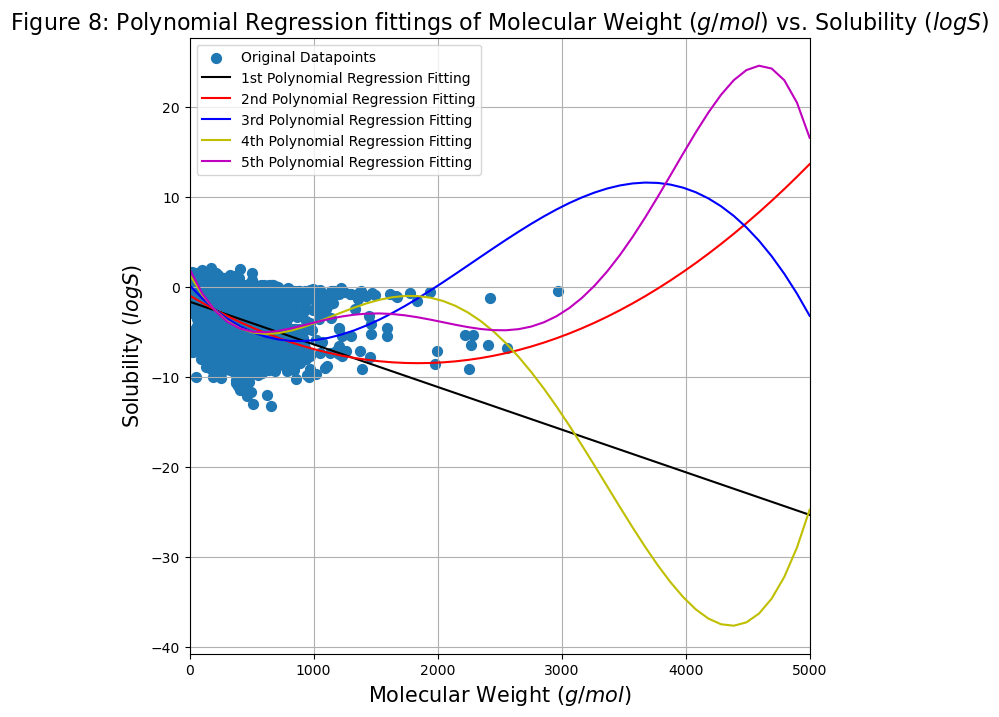

In [27]:
# polynomial fitting for Molecular Weight vs. Solubility

x=data['MolWt']
X=data[['MolWt']]
y=data['Solubility']
#different Degree Models from 1 to 5
poly_model_1 = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model_2 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
poly_model_3 = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())
poly_model_4 = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())
poly_model_5 = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

#fitting
poly_model_1.fit(X,y)
xfit_1 = np.linspace(0,5000)
Xfit_1 = xfit_1[:, np.newaxis]
yfit_1 = poly_model_1.predict(Xfit_1)

poly_model_2.fit(X,y)
xfit_2 = np.linspace(0,5000)
Xfit_2 = xfit_2[:, np.newaxis]
yfit_2 = poly_model_2.predict(Xfit_2)

poly_model_3.fit(X,y)
xfit_3 = np.linspace(0,5000)
Xfit_3 = xfit_3[:, np.newaxis]
yfit_3 = poly_model_3.predict(Xfit_3)

poly_model_4.fit(X,y)
xfit_4 = np.linspace(0,5000)
Xfit_4 = xfit_3[:, np.newaxis]
yfit_4 = poly_model_4.predict(Xfit_4)

poly_model_5.fit(X,y)
xfit_5 = np.linspace(0,5000)
Xfit_5 = xfit_5[:, np.newaxis]
yfit_5 = poly_model_5.predict(Xfit_5)


plt.figure(figsize = (8,8))
plt.scatter(x, y, s=50, label='Original Datapoints')
plt.plot(xfit_1, yfit_1,label='1st Polynomial Regression Fitting',c='k');
plt.plot(xfit_2, yfit_2,label='2nd Polynomial Regression Fitting', c = 'r');
plt.plot(xfit_3, yfit_3,label='3rd Polynomial Regression Fitting', c = 'b');
plt.plot(xfit_4, yfit_4,label='4th Polynomial Regression Fitting', c = 'y');
plt.plot(xfit_5, yfit_5, label='5th Polynomial Regression Fitting', c = 'm');


plt.xlim(0,5000)
plt.title('Figure 8: Polynomial Regression fittings of Molecular Weight ($g/mol$) vs. Solubility ($logS$)',fontsize=16)
plt.xlabel('Molecular Weight ($g/mol$)',fontsize=15)
plt.ylabel('Solubility ($logS$)',fontsize=15)
plt.legend()
plt.grid()

Conclusion: From the several degress of polynomial fitting models, we can say that the molecular weight and solubility doesn't show any polynomial relation between them neither.

 D) Exploring the Relationship between Molecular Structure (Number of Valence Electrons & Number of Rotatable Bonds) vs. Solubility 

Text(0, 0.5, 'Solubility ($logS$)')

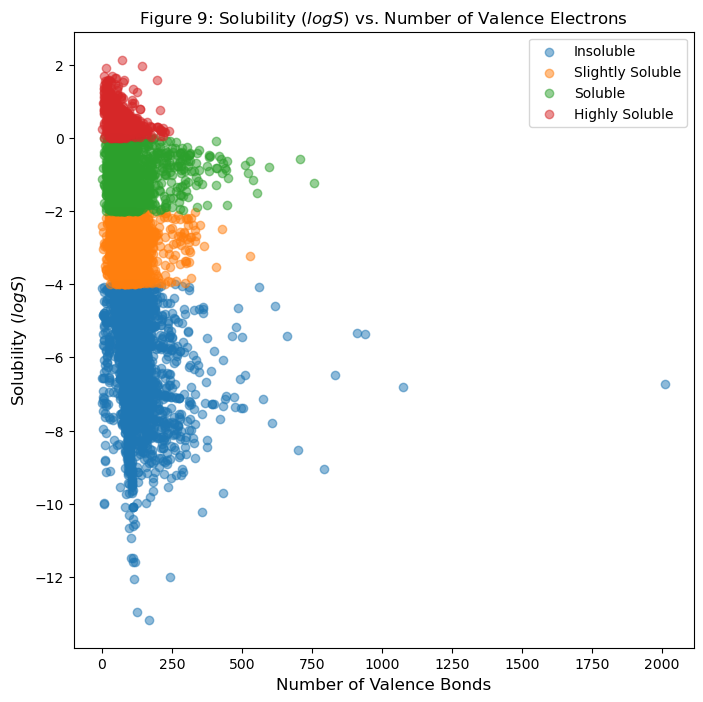

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(insoluble['NumValenceElectrons'],insoluble['Solubility'],label='Insoluble', alpha =0.5)
plt.scatter(slightly_soluble['NumValenceElectrons'],slightly_soluble['Solubility'],label='Slightly Soluble', alpha =0.5)
plt.scatter(soluble['NumValenceElectrons'],soluble['Solubility'],label='Soluble', alpha =0.5)
plt.scatter(highly_soluble['NumValenceElectrons'],highly_soluble['Solubility'],label='Highly Soluble', alpha =0.5)
plt.legend()
plt.title('Figure 9: Solubility ($logS$) vs. Number of Valence Electrons',fontsize=12)
plt.xlabel('Number of Valence Bonds',fontsize=12)
plt.ylabel('Solubility ($logS$)',fontsize=12)

In [29]:
print("Insoluble describe:", insoluble['NumValenceElectrons'].describe())
print("Slightly soluble describe:", slightly_soluble['NumValenceElectrons'].describe())
print("Soluble describe:", soluble['NumValenceElectrons'].describe())
print("Highly soluble describe:", highly_soluble['NumValenceElectrons'].describe())

Insoluble describe: count    2879.000000
mean      123.865926
std        81.654240
min         0.000000
25%        88.000000
50%       108.000000
75%       142.000000
max      2012.000000
Name: NumValenceElectrons, dtype: float64
Slightly soluble describe: count    3207.000000
mean       90.266292
std        42.699426
min         0.000000
25%        65.500000
50%        82.000000
75%       106.000000
max       528.000000
Name: NumValenceElectrons, dtype: float64
Soluble describe: count    2840.000000
mean       82.417254
std        62.694107
min         2.000000
25%        50.000000
50%        66.000000
75%        90.000000
max       756.000000
Name: NumValenceElectrons, dtype: float64
Highly soluble describe: count    1056.000000
mean       57.366477
std        34.295250
min         1.000000
25%        36.000000
50%        50.000000
75%        72.000000
max       240.000000
Name: NumValenceElectrons, dtype: float64


In [30]:
print("For number of Valence Electrons:")
print("Insoluble mean:", insoluble['NumValenceElectrons'].mean(), "Insoluble median:", insoluble['NumValenceElectrons'].median())
print("Slightly soluble mean:", slightly_soluble['NumValenceElectrons'].mean(), "Slightly soluble median:", slightly_soluble['NumValenceElectrons'].median())
print("Soluble mean:", soluble['NumValenceElectrons'].mean(), "Soluble median:", soluble['NumValenceElectrons'].median())
print("Highly soluble mean:", highly_soluble['NumValenceElectrons'].mean(), "Hightly soluble median:", highly_soluble['NumValenceElectrons'].median())

For number of Valence Electrons:
Insoluble mean: 123.86592566863494 Insoluble median: 108.0
Slightly soluble mean: 90.26629248518864 Slightly soluble median: 82.0
Soluble mean: 82.41725352112677 Soluble median: 66.0
Highly soluble mean: 57.36647727272727 Hightly soluble median: 50.0


Text(0, 0.5, 'Solubility ($logS$)')

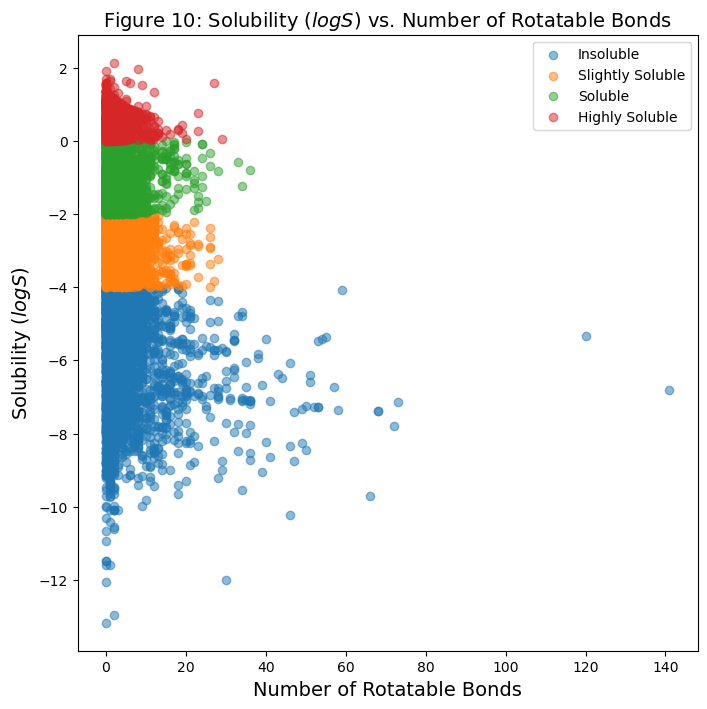

In [31]:
plt.figure(figsize=(8, 8))
plt.scatter(insoluble['NumRotatableBonds'],insoluble['Solubility'],label='Insoluble', alpha =0.5)
plt.scatter(slightly_soluble['NumRotatableBonds'],slightly_soluble['Solubility'],label='Slightly Soluble', alpha =0.5)
plt.scatter(soluble['NumRotatableBonds'],soluble['Solubility'],label='Soluble', alpha =0.5)
plt.scatter(highly_soluble['NumRotatableBonds'],highly_soluble['Solubility'],label='Highly Soluble', alpha =0.5)
plt.legend()
plt.title('Figure 10: Solubility ($logS$) vs. Number of Rotatable Bonds',fontsize=14)
plt.xlabel('Number of Rotatable Bonds',fontsize=14)
plt.ylabel('Solubility ($logS$)',fontsize=14)

In [32]:
print("Insoluble describe:", insoluble['NumRotatableBonds'].describe())
print("Slightly soluble describe:", slightly_soluble['NumRotatableBonds'].describe())
print("Soluble describe:", soluble['NumRotatableBonds'].describe())
print("Highly soluble describe:", highly_soluble['NumRotatableBonds'].describe())

Insoluble describe: count    2879.000000
mean        5.836749
std         8.593460
min         0.000000
25%         1.000000
50%         4.000000
75%         7.000000
max       141.000000
Name: NumRotatableBonds, dtype: float64
Slightly soluble describe: count    3207.000000
mean        3.648893
std         3.551715
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        28.000000
Name: NumRotatableBonds, dtype: float64
Soluble describe: count    2840.000000
mean        3.317606
std         3.738527
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        36.000000
Name: NumRotatableBonds, dtype: float64
Highly soluble describe: count    1056.000000
mean        2.584280
std         3.389767
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        29.000000
Name: NumRotatableBonds, dtype: float64


In [33]:
print("For number of Rotatable Bonds:")
print("Insoluble mean:", insoluble['NumRotatableBonds'].mean(), "Insoluble median:", insoluble['NumRotatableBonds'].median())
print("Slightly soluble mean:", slightly_soluble['NumRotatableBonds'].mean(), "Slightly soluble median:", slightly_soluble['NumRotatableBonds'].median())
print("Soluble mean:", soluble['NumRotatableBonds'].mean(), "Soluble median:", soluble['NumRotatableBonds'].median())
print("Highly soluble mean:", highly_soluble['NumRotatableBonds'].mean(), "Hightly soluble median:", highly_soluble['NumRotatableBonds'].median())


For number of Rotatable Bonds:
Insoluble mean: 5.836748871135811 Insoluble median: 4.0
Slightly soluble mean: 3.648893046460867 Slightly soluble median: 3.0
Soluble mean: 3.317605633802817 Soluble median: 2.0
Highly soluble mean: 2.584280303030303 Hightly soluble median: 2.0


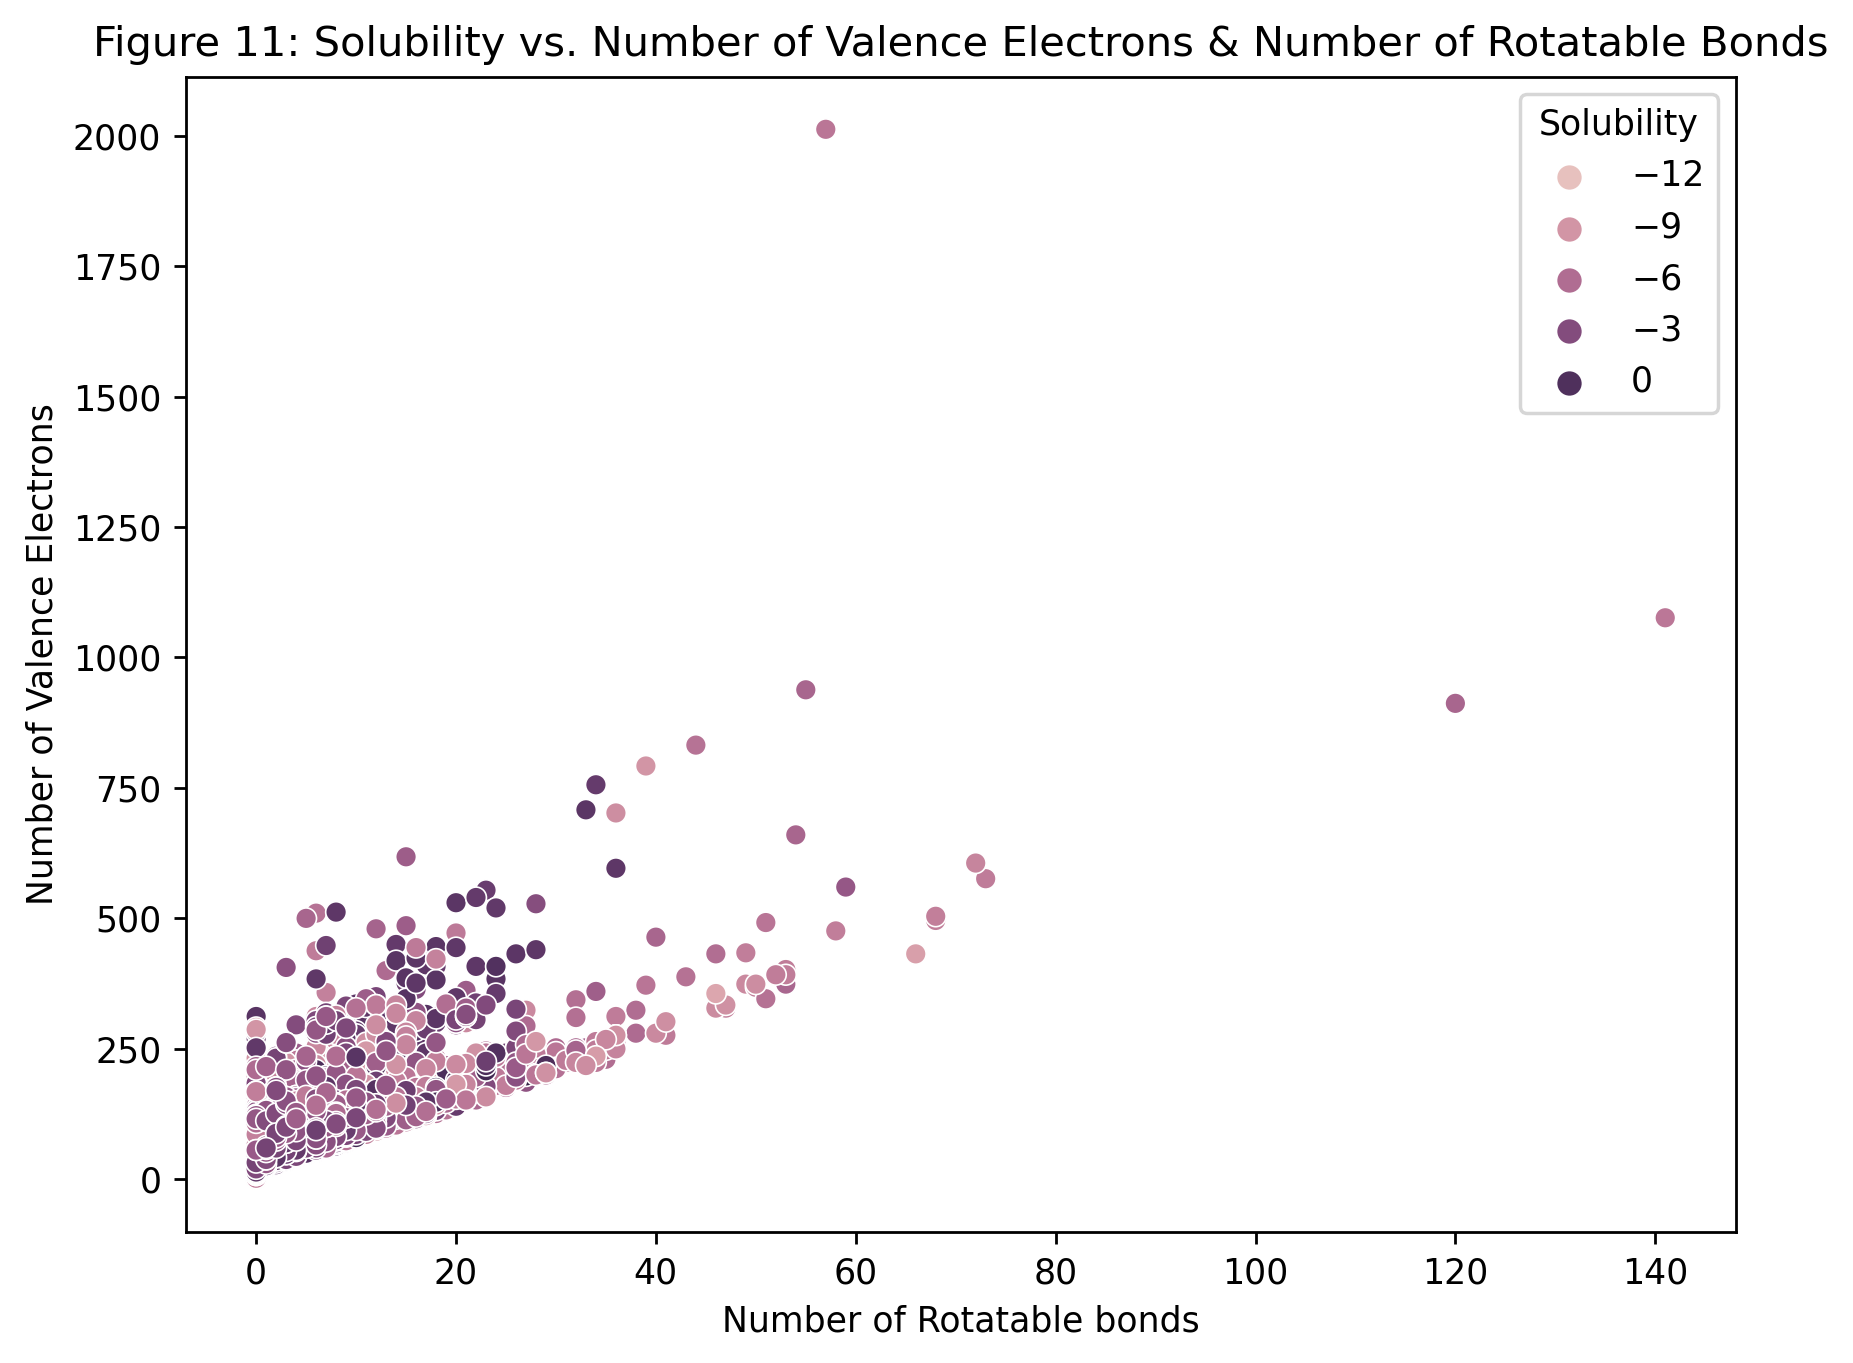

In [34]:
plt.figure(figsize=(8,6),dpi=250)
sns.scatterplot(x="NumRotatableBonds",y='NumValenceElectrons',data=data,hue='Solubility')
plt.xlabel('Number of Rotatable bonds')
plt.ylabel('Number of Valence Electrons')
plt.title('Figure 11: Solubility vs. Number of Valence Electrons & Number of Rotatable Bonds')
plt.show()

In [38]:
x_simple_1 = np.array(data['NumValenceElectrons'])
x_simple_2 = np.array(data['NumRotatableBonds'])
y_simple = np.array(data['Solubility'])
my_rho_1 = np.corrcoef(x_simple_1, y_simple)
my_rho_2 = np.corrcoef(x_simple_2, y_simple)

print(my_rho_1)
print(my_rho_2)

[[ 1.         -0.34636867]
 [-0.34636867  1.        ]]
[[ 1.         -0.22203983]
 [-0.22203983  1.        ]]


In [39]:
# step 1: Choose a class of model and import it from sklearn - Done Already

# step 2: Choose model hyperparameters by instantiating this class with desired values.
degree = dict()
for j in range(1,31):
    degree[j] = make_pipeline(PolynomialFeatures(j), LinearRegression())

# step 3: Arrange data into a features matrix (x or x matrix) and target vector (y).
X_E3 = data[['NumRotatableBonds','NumValenceElectrons']]
y_E3 = data['Solubility']

# step 4: Fit the model to your data by calling fit().
for j in range(1,31):
    degree[j].fit(X_E3, y_E3)

MSE = dict()
R2 = dict()
for j in range(1,31):
    MSE[j] = mean_squared_error(y_E3, degree[j].predict(X_E3))
    R2[j] = r2_score(y_E3, degree[j].predict(X_E3))   
    print("MSE_{}".format(j), MSE[j], "R2_{}".format(j), R2[j])
# the optimal degree number for modeling this data is 5: highest R2 (0.2735630793650984) and lowest MSE (4.073563073936446) values

MSE_1 4.928070332509615 R2_1 0.12117913186966578
MSE_2 4.606809206888984 R2_2 0.17846950361049985
MSE_3 4.193705760939519 R2_3 0.2521380806602235
MSE_4 4.109142914088497 R2_4 0.26721814029146307
MSE_5 4.0735624362558 R2_5 0.27356319308244026
MSE_6 4.113071824107036 R2_6 0.2665174992940078
MSE_7 5.1105179460334265 R2_7 0.08864331982015494
MSE_8 8.651313131004763 R2_8 -0.5427853101246565
MSE_9 8.598776677032964 R2_9 -0.5334165046951946
MSE_10 5.538876946293649 R2_10 0.012254225696081478
MSE_11 7.302940251549268 R2_11 -0.3023304982950885
MSE_12 6.551460420625753 R2_12 -0.16831939195230938
MSE_13 6.113912749615224 R2_13 -0.09029168574259328
MSE_14 7.85268093779686 R2_14 -0.40036554133162805
MSE_15 6.351108749403476 R2_15 -0.1325907562481068
MSE_16 5.81755701211958 R2_16 -0.037442682191806353
MSE_17 11.22506707897333 R2_17 -1.0017618519135305
MSE_18 5.596737903678144 R2_18 0.0019359036412905928
MSE_19 5.597757078650567 R2_19 0.0017541545643481316
MSE_20 5.7689780959795485 R2_20 -0.028779622

Text(0.5, 0.92, 'Figure 12: 3D fitting of Number of Rotatable Bonds and Number of Valence Electrons data to Solubility')

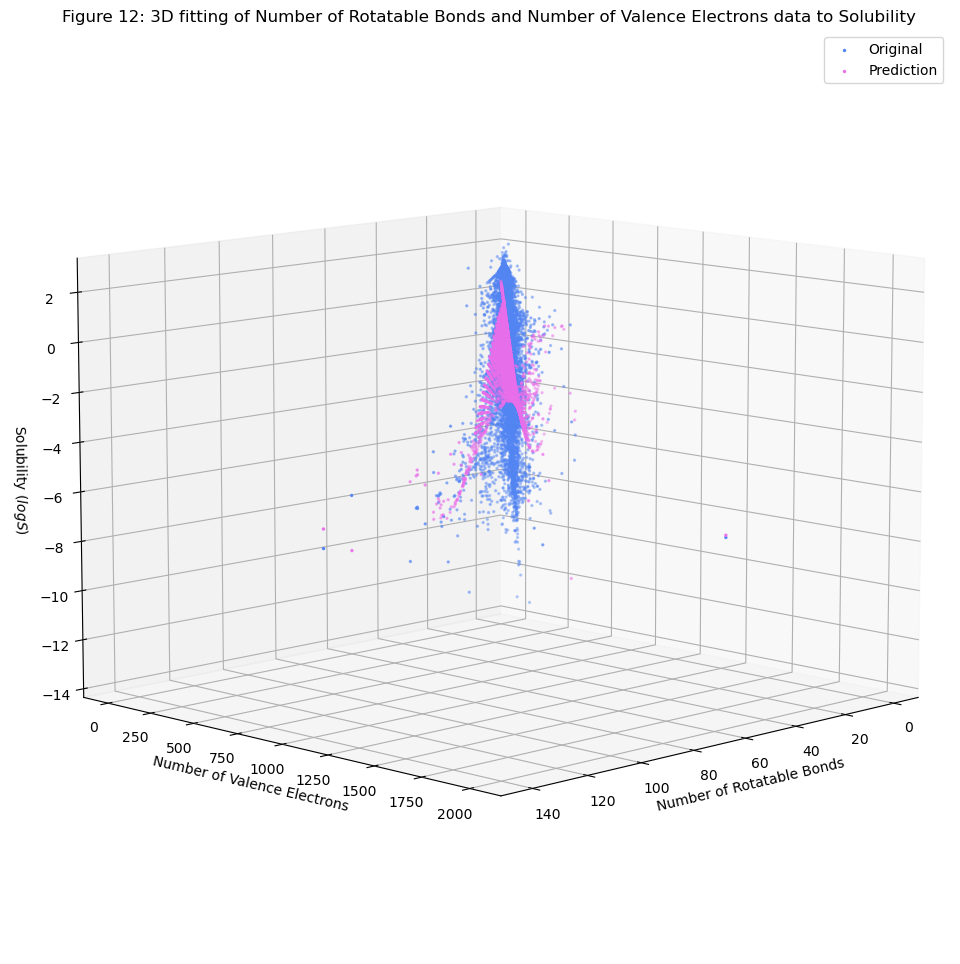

In [40]:
model = make_pipeline(PolynomialFeatures(5), LinearRegression())
X = data[['NumRotatableBonds','NumValenceElectrons']]
y = data['Solubility']
model.fit(X,y)

plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
ax = plt.axes(projection='3d')
plot1=ax.scatter3D(data['NumRotatableBonds'], data['NumValenceElectrons'], data['Solubility'], s=2, 
                   c='#5284F2', label='Original')
plot2=ax.scatter3D(data['NumRotatableBonds'], data['NumValenceElectrons'],
                   model.predict(data[['NumRotatableBonds','NumValenceElectrons']]), c='#EA6EEA', s=2,  
                   label='Prediction')
ax.view_init(10,45)
ax.set_xlabel('Number of Rotatable Bonds')
ax.set_ylabel('Number of Valence Electrons')
ax.set_zlabel('Solubility ($logS$)')
ax.set_zlim(-14,3)
ax.legend()
ax.set_title('Figure 12: 3D fitting of Number of Rotatable Bonds and Number of Valence Electrons data to Solubility')

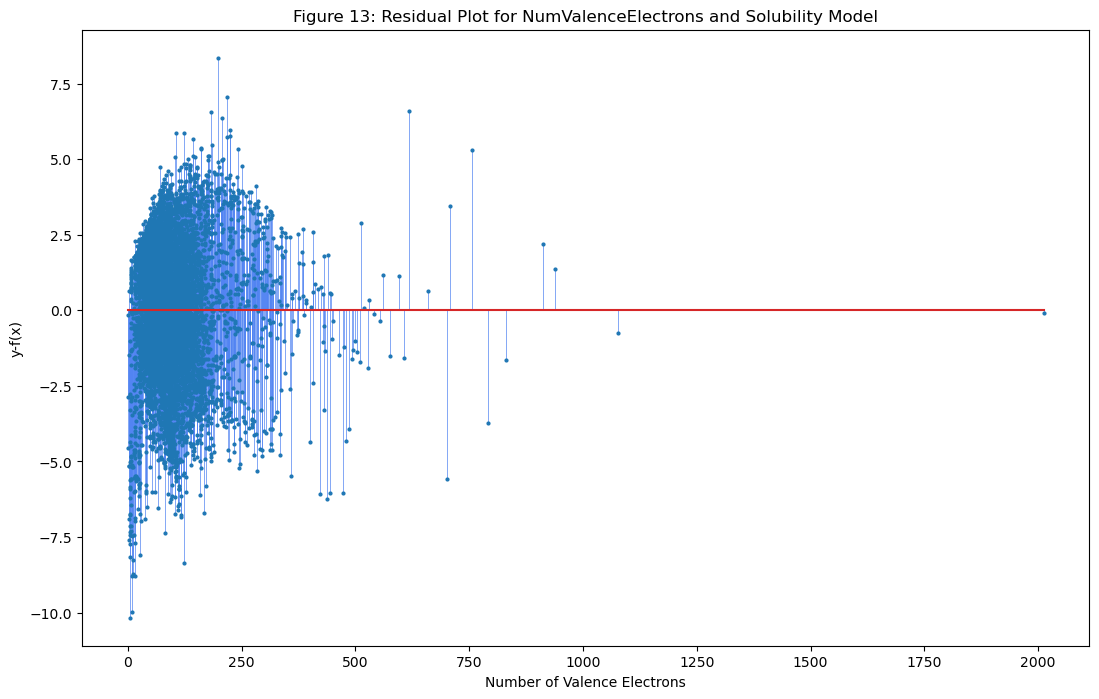

In [41]:
plt.figure(figsize=(13,8))
plt.title('Figure 13: Residual Plot for NumValenceElectrons and Solubility Model')
plt.xlabel('Number of Valence Electrons')
plt.ylabel('y-f(x)')

markerline, stemline, baseline = plt.stem(data['NumValenceElectrons'],data['Solubility']-model.predict(data[['NumRotatableBonds','NumValenceElectrons']]), use_line_collection=True)
plt.setp(stemline, linewidth = 0.7, color='#5284F2')
plt.setp(stemline, linewidth = 0.5, color='#5284F2')
plt.setp(markerline, markersize = 2)
plt.show()

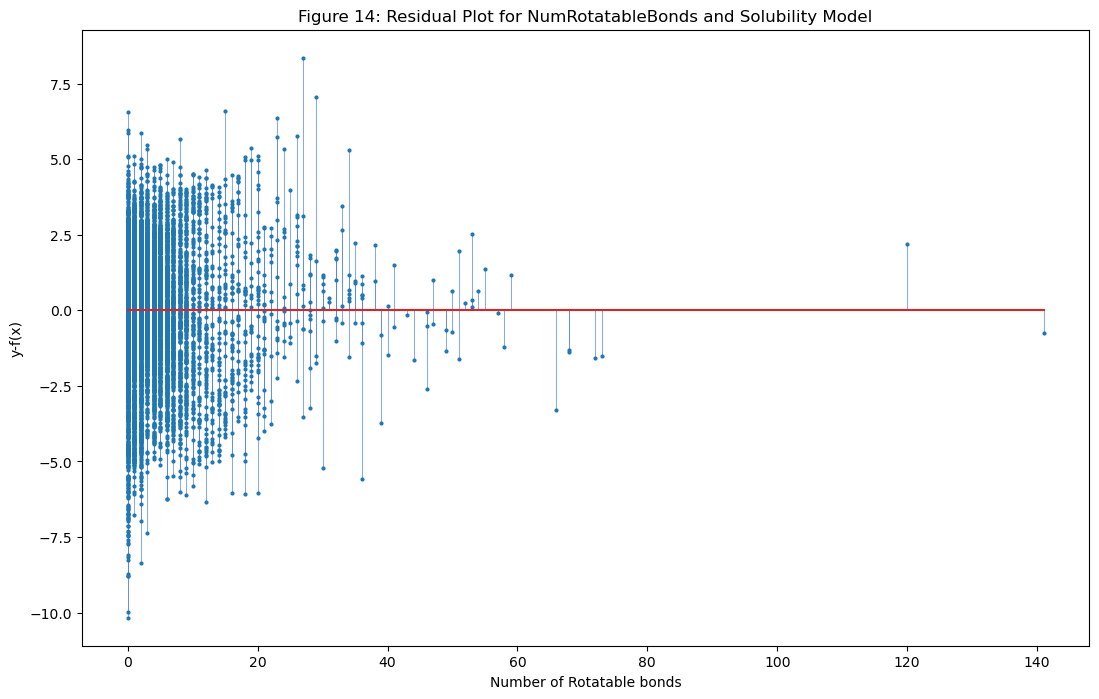

In [42]:
plt.figure(figsize=(13,8))
plt.title('Figure 14: Residual Plot for NumRotatableBonds and Solubility Model')
plt.xlabel('Number of Rotatable bonds')
plt.ylabel('y-f(x)')

markerline, stemline, baseline = plt.stem(data['NumRotatableBonds'],data['Solubility']-model.predict(data[['NumRotatableBonds','NumValenceElectrons']]), use_line_collection=True)
plt.setp(stemline, linewidth = 0.7, color='#5284F2')
plt.setp(stemline, linewidth = 0.5, color='#5284F2')
plt.setp(markerline, markersize = 2)
plt.show()